# Model implementations

In [4]:
import pandas as pd
from surprise import Reader, Dataset

# load the ratings data
ratings = pd.read_csv('MovieLens_data/ratings_cleaned.csv')

# define a Reader and load the data into a Dataset
reader = Reader()
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# get 1% of the data to tune the hyperparameters of the SVD++ model
ratings_1 = ratings.sample(frac=0.1, random_state=1)
data_10 = Dataset.load_from_df(ratings_1[['userId', 'movieId', 'rating']], reader)

average_scores = [] # storing the average scores of the cross validation for each model to plot at the end (name of the model, score)

## Normal Predictor Model

In [4]:
from surprise import NormalPredictor
from surprise.model_selection import GridSearchCV

# getting the best model using grid search CV
params_grid = {} # no hyperparameters to tune
grid_search = GridSearchCV(NormalPredictor, params_grid, measures=['rmse', 'mae'], cv=5, n_jobs=-1)
grid_search.fit(data) # fitting the best model

print("Best score found in the gridSearchCV: ", grid_search.best_score['rmse'])
#print("Best parameters found in the gridSearchCV: ", grid_search.best_params['rmse'])

average_scores.append(('Normal Predictor', grid_search.best_score['rmse'])) # storing the average RMSE of the best model

Best score found in the gridSearchCV:  1.4325232539910562


## BaselineOnly Model

In [5]:
from surprise import BaselineOnly
from surprise.model_selection import GridSearchCV

# getting the best model using grid search CV
params_grid = {'bsl_options': {'method': ['als', 'sgd'], 'reg_i': [5, 10, 15], 'reg_u': [5, 10, 15]}}

grid_search = GridSearchCV(BaselineOnly, params_grid, measures=['rmse', 'mae'], cv=5, n_jobs=-1)
grid_search.fit(data) # fitting the best model

print("Best score found in the gridSearchCV: ", grid_search.best_score['rmse'])
print("Best parameters found in the gridSearchCV: ", grid_search.best_params['rmse'])

average_scores.append(('BaselineOnly', grid_search.best_score['rmse'])) # storing the average RMSE of the best model

C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best score found in the gridSearchCV:  0.8571572130397502
Best parameters found in the gridSearchCV:  {'bsl_options': {'method': 'als', 'reg_i': 5, 'reg_u': 5}}


## KNN Models

### KNN Basic Model

In [ ]:
from surprise import KNNBasic
from surprise.model_selection import GridSearchCV

# getting the best model using grid search CV
params_grid = {'k': [20, 30, 40, 50], 'sim_options': {'name': ['cosine', 'msd', 'pearson']}}
grid_search = GridSearchCV(KNNBasic, params_grid, measures=['rmse', 'mae'], cv=5, n_jobs=1, joblib_verbose=100)
grid_search.fit(data_10) # fitting the best model

print("Best score found in the gridSearchCV: ", grid_search.best_score['rmse'])
print("Best parameters found in the gridSearchCV: ", grid_search.best_params['rmse'])

average_scores.append(('KNN Basic', grid_search.best_score['rmse'])) # storing the average RMSE of the best model

### KNN With Means Model

In [ ]:
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV

# getting the best model using grid search CV
params_grid = {'k': [10, 20, 30, 40, 50], 'sim_options': {'name': ['cosine', 'msd', 'pearson']}}
grid_search = GridSearchCV(KNNWithMeans, params_grid, measures=['rmse', 'mae'], cv=5, n_jobs=1, joblib_verbose=100)
grid_search.fit(data_10) # fitting the best model

print("Best score found in the gridSearchCV: ", grid_search.best_score['rmse'])
print("Best parameters found in the gridSearchCV: ", grid_search.best_params['rmse'])

average_scores.append(('KNN With Means', grid_search.best_score['rmse'])) # storing the average RMSE of the best model

## SVD, SVD++ and NMF Models

### SVD Model

In [6]:
from surprise import SVD
from surprise.model_selection import GridSearchCV

# getting the best model using grid search CV (only the training set)
params_grid = {'n_epochs': [15, 20, 25], 'lr_all': [0.002, 0.005], 'reg_all': [0.4, 0.6]}
grid_search = GridSearchCV(SVD, params_grid, measures=['rmse', 'mae'], cv=5, n_jobs=1, joblib_verbose=100)
grid_search.fit(data) # fitting the best model

print("Best score found in the gridSearchCV: ", grid_search.best_score['rmse'])
print("Best parameters found in the gridSearchCV: ", grid_search.best_params['rmse'])

average_scores.append(('SVD', grid_search.best_score['rmse'])) # storing the average RMSE of the best model

C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best score found in the gridSearchCV:  0.8803879344269481
Best parameters found in the gridSearchCV:  {'n_epochs': 20, 'lr_all': 0.002, 'reg_all': 0.4}


### SVD++ Model

In [5]:
from surprise import SVDpp
from surprise.model_selection import GridSearchCV

# getting the best model using grid search CV
params_grid = {'n_epochs': [15, 20, 25], 'lr_all': [0.002, 0.005], 'reg_all': [0.4, 0.6]}
grid_search = GridSearchCV(SVDpp, params_grid, measures=['rmse', 'mae'], cv=5, n_jobs=1, joblib_verbose=100)
grid_search.fit(data_10) # fitting the best model

print("Best score found in the gridSearchCV: ", grid_search.best_score['rmse'])
print("Best parameters found in the gridSearchCV: ", grid_search.best_params['rmse'])

average_scores.append(('SVD++', grid_search.best_score['rmse'])) # storing the average RMSE of the best model

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  2.1min
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  4.1min
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  5.8min
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:  7.5min
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:  9.3min
[Parallel(n_jobs=1)]: Done   6 tasks      | elapsed: 11.0min
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed: 12.7min
[Parallel(n_jobs=1)]: Done   8 tasks      | elapsed: 14.6min
[Parallel(n_jobs=1)]: Done   9 tasks      | elapsed: 16.3min
[Parallel(n_jobs=1)]: Done  10 tasks      | elapsed: 18.0min
[Parallel(n_jobs=1)]: Done  11 tasks      | elapsed: 19.7min
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed: 21.3min
[Parallel(n_jobs=1)]: Done  13 tasks      | elapsed: 23.1min
[Parallel(n_jobs=1)]: Done  14 tasks      | elapsed: 24.7min
[Parallel(n_jobs=1)]: Done  15 tasks      | elapsed: 26.3min
[Parallel(n_jobs=1)]: Done  16 tasks      | elapsed: 27.9min
[Parallel(n_jobs=1)]: Do

### Non-negative Matrix Factorization Models (NMF)

In [6]:
from surprise import NMF
from surprise.model_selection import GridSearchCV

# getting the best model using grid search CV
params_grid = {'n_epochs': [15, 20, 25], 'lr_bu': [0.002, 0.005], 'lr_bi': [0.002, 0.005], 'reg_pu': [0.4, 0.6], 'reg_qi': [0.4, 0.6]}
grid_search = GridSearchCV(NMF, params_grid, measures=['rmse', 'mae'], cv=5, n_jobs=1, joblib_verbose=100)
grid_search.fit(data_10) # fitting the best model
    
print("Best score found in the gridSearchCV: ", grid_search.best_score['rmse'])
print("Best parameters found in the gridSearchCV: ", grid_search.best_params['rmse'])

average_scores.append(('NMF', grid_search.best_score['rmse'])) # storing the average RMSE of the best model

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:   17.8s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:   33.4s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:   51.9s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:  1.4min
[Parallel(n_jobs=1)]: Done   6 tasks      | elapsed:  1.7min
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:  2.0min
[Parallel(n_jobs=1)]: Done   8 tasks      | elapsed:  2.3min
[Parallel(n_jobs=1)]: Done   9 tasks      | elapsed:  2.6min
[Parallel(n_jobs=1)]: Done  10 tasks      | elapsed:  3.0min
[Parallel(n_jobs=1)]: Done  11 tasks      | elapsed:  3.3min
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:  3.6min
[Parallel(n_jobs=1)]: Done  13 tasks      | elapsed:  3.9min
[Parallel(n_jobs=1)]: Done  14 tasks      | elapsed:  4.1min
[Parallel(n_jobs=1)]: Done  15 tasks      | elapsed:  4.4min
[Parallel(n_jobs=1)]: Done  16 tasks      | elapsed:  4.8min
[Parallel(n_jobs=1)]: Do

## Slope One Model



In [9]:
from surprise import SlopeOne
from surprise.model_selection import GridSearchCV

# getting the best model using grid search CV
params_grid = {} # no hyperparameters to tune
grid_search = GridSearchCV(SlopeOne, params_grid, measures=['rmse', 'mae'], cv=5, n_jobs=1, joblib_verbose=100)
grid_search.fit(data) # fitting the best model

print("Best score found in the gridSearchCV: ", grid_search.best_score['rmse'])
#print("Best parameters found in the gridSearchCV: ", grid_search.best_params['rmse'])

average_scores.append(('Slope One', grid_search.best_score['rmse'])) # storing the average RMSE of the best model

C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best score found in the gridSearchCV:  0.8545399607181323
Best parameters found in the gridSearchCV:  {}


## Co-clustering Model

In [8]:
from surprise import CoClustering
from surprise.model_selection import GridSearchCV

# getting the best model using grid search CV
params_grid = {'n_cltr_u': [20, 30], 'n_cltr_i': [20, 30], 'n_epochs': [20, 30]}
grid_search = GridSearchCV(CoClustering, params_grid, measures=['rmse', 'mae'], cv=5, n_jobs=1, joblib_verbose=100)
grid_search.fit(data_10) # fitting the best model

print("Best score found in the gridSearchCV: ", grid_search.best_score['rmse'])
print("Best parameters found in the gridSearchCV: ", grid_search.best_params['rmse'])

average_scores.append(('Co-clustering', grid_search.best_score['rmse'])) # storing the average RMSE of the best model

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  3.2min
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:  6.3min
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:  9.3min
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed: 12.3min
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed: 15.2min
[Parallel(n_jobs=1)]: Done   6 tasks      | elapsed: 19.2min
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed: 23.3min
[Parallel(n_jobs=1)]: Done   8 tasks      | elapsed: 27.4min
[Parallel(n_jobs=1)]: Done   9 tasks      | elapsed: 31.3min
[Parallel(n_jobs=1)]: Done  10 tasks      | elapsed: 35.3min
[Parallel(n_jobs=1)]: Done  11 tasks      | elapsed: 38.5min
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed: 41.8min
[Parallel(n_jobs=1)]: Done  13 tasks      | elapsed: 45.0min
[Parallel(n_jobs=1)]: Done  14 tasks      | elapsed: 48.2min
[Parallel(n_jobs=1)]: Done  15 tasks      | elapsed: 51.5min
[Parallel(n_jobs=1)]: Done  16 tasks      | elapsed: 56.4min
[Parallel(n_jobs=1)]: Do

## Plotting the best scores of each model

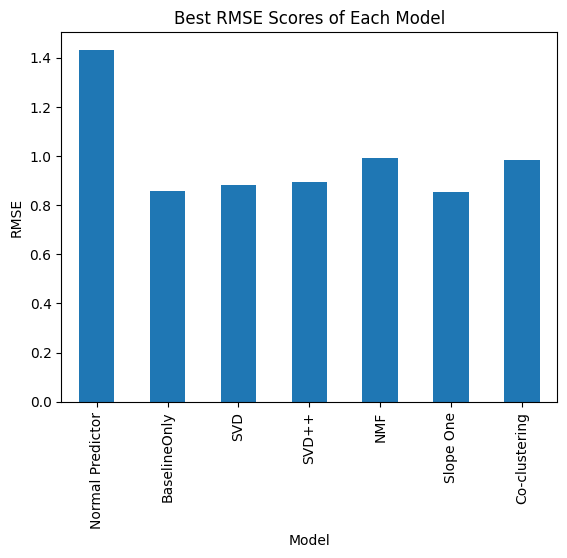

In [10]:
import matplotlib.pyplot as plt

# delete later
average_scores = [ { "Model": "Normal Predictor", "RMSE": 1.4325232539910562 }, { "Model": "BaselineOnly", "RMSE": 0.8571572130397502 }, { "Model": "SVD", "RMSE": 0.8803879344269481 }, { "Model": "SVD++", "RMSE": 0.8945842061742721 }, { "Model": "NMF", "RMSE": 0.9915365170152469 }, { "Model": "Slope One", "RMSE": 0.8545399607181323 }, { "Model": "Co-clustering", "RMSE": 0.985568457116211 } ]

# plotting the best scores of each model, the lower the RMSE the better the model
best_scores = pd.DataFrame(average_scores, columns=['Model', 'RMSE'])
best_scores.plot(kind='bar', x='Model', y='RMSE', legend=False)
plt.title('Best RMSE Scores of Each Model')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.show()